## Машинное обучение

Пензин М.С.

penzin.ml.tsu@gmail.com

In [24]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from pylab import rcParams
rcParams['figure.figsize'] = 12, 6
from matplotlib import pyplot as plt

# Теория вероятности

In [25]:
df = pd.read_csv("../data/mlbootcamp5_train.csv", 
                 sep=";", 
                 index_col="id")
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


## Случайная величина

Пусть $x$ - это некоторая случайная величина. Она может быть 
* дискретной
* непрерывной

## Дискретная случайная величина

Вероятность дискретной случайной величины можно определить как
$$
P(x) = \lim_{N \rightarrow \infty} \frac{n_{x}}{N}
$$

In [86]:
x = np.random.randint(0, 2, 100)
print(x[:10])
print(x.sum() / x.shape[0])

[1 1 0 1 1 1 0 0 1 1]
0.5029


In [27]:
df['gender'].value_counts() / df.shape[0]

1    0.650429
2    0.349571
Name: gender, dtype: float64

## Непрерывная случайная величина

Вероятность непрерывной случайной величины всегда определяется в пределах какого-то интервала

$$
P(x \le \tilde{x} \le x + dx) = \lim_{N\rightarrow\infty} \frac{n_x}{N}
$$

Плотность вероятности:
$$
f(x)dx = P(x \le \tilde{x} \le x +dx)
$$

Функция вероятности
$$
P(x_1 \le \tilde{x} \le x_2) = \int_{x_1}^{x_2} f(x) dx = F(x_2) - F(x_1) \\
F(x) = P(\tilde{x} \le x) = \int_{-\infty}^x f(\tilde{x}) d\tilde{x}
$$

In [28]:
df[(65 <= df['weight']) & (df['weight'] <= 75)].shape[0] / df.shape[0]

0.36428571428571427

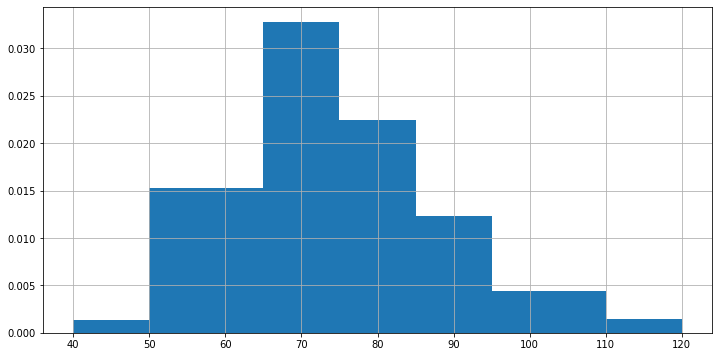

In [29]:
df['weight'].hist(bins=(40, 50, 65, 75, 85, 95, 110, 120), density=True);

## Биномиальное распределение

Пусть $p$ - вероятность выпадения орла, тогда вероятность того, что $r$ раз подряд выпадет орел и $N-r$ раз выпадет решка

$$
p^r (1 - p)^{N-r}
$$

Это всего лишь один из $C_N^r$ способов получить $r$ орлов при $N$ бросках монеты.

$$
P(r) = C_N^r p^r(1 - p)^{N-r} \\
C_N^r = \frac{N!}{r!(N-r)!}
$$

## Распределение Пуассона

Показывается вероятность появления $r$ событий за фиксированный промежуток времени при средней интенсивности событий $\lambda$

$$
P(r) = \frac{\lambda^r}{r!} e^{-\lambda}
$$

## Равномерное распределение

$$
f(x) = \left\{  
\begin{matrix}
\frac{1}{a-b},& x \in [a,b) \\
0,& x \notin [a,b)
\end{matrix}
\right.
$$

In [30]:
from scipy.stats import uniform

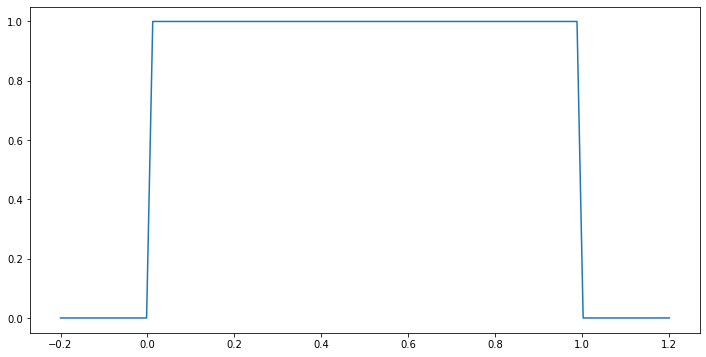

In [31]:
x = np.linspace(-0.2, 1.2, 100)
plt.plot(x, uniform.pdf(x));

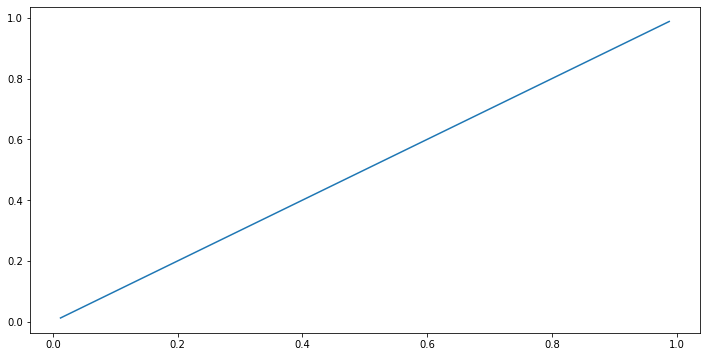

In [32]:
plt.plot(x, uniform.ppf(x));

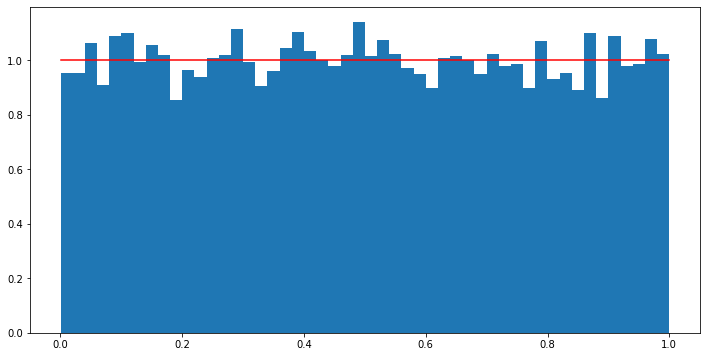

In [33]:
x = np.random.uniform(0, 1, 10000)
xv = np.linspace(x.min(), x.max(), 100)
plt.hist(x, density=True, bins=50)
plt.plot(xv, uniform.pdf(xv), "r");

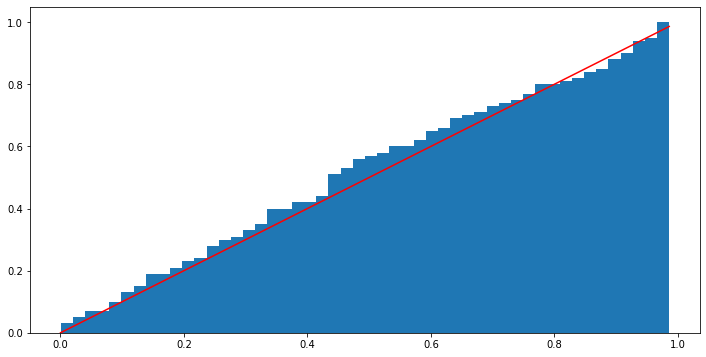

In [34]:
x = np.random.uniform(0, 1, 100)
xv = np.linspace(x.min(), x.max(), 100)
plt.hist(x, density=True, cumulative=True, bins=50)
plt.plot(xv, uniform.cdf(xv), "r");

## Нормальное распределение

$$
f(x) = \frac{1}{ \sqrt{2\pi \sigma^2}} e^{-\frac{(x-\mu)^2}{2\sigma^2}}
$$

In [35]:
from scipy.stats import norm

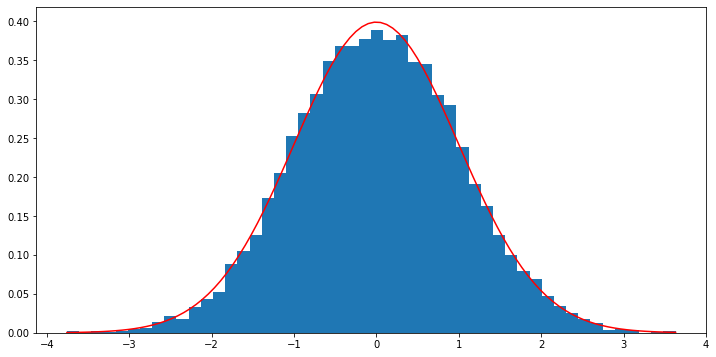

In [36]:
x = np.random.normal(0, 1, 10000)
xv = np.linspace(x.min(), x.max(), 100)
plt.hist(x, density=True, bins=50)
plt.plot(xv, norm.pdf(xv), "r")
plt.show()

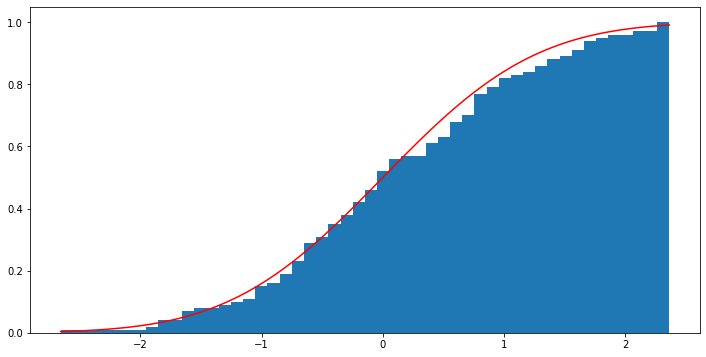

In [37]:
x = np.random.normal(0, 1, 100)
xv = np.linspace(x.min(), x.max(), 100)
plt.hist(x, density=True, cumulative=True, bins=50)
plt.plot(xv, norm.cdf(xv), "r")
plt.show()

## Математическое ожидание (среднее)

Для дискретное случайной величины

$$
\mu = E[x] = \sum_r r P(x=r)
$$

Для непрерывной случайной величины

$$
\mu = E[x] = \int_{-\infty}^{+\infty} x f(x) dx
$$

Можно определенить среднее значение функции от случайной величины $x$

Для дискретной

$$
\mu = E[g(x)] = \sum_r g(r) P(x=r)
$$

Для непрерывной

$$
\mu = E[g(x)] = \int_{-\infty}^{+\infty} g(x) f(x) dx
$$

## Среднеквадратичное отклонение (дисперсия)

Для дискретной

$$
\sigma^2 = D[x] = \sum_r (r-\mu)^2 P(x=r)
$$

Для непрерывной
$$
\sigma^2 = D[x] = \int_{-\infty}^{\infty} (x-\mu)^2 f(x) dx
$$

## Выборочное среднее и выборочная дисперсия

$$
    \bar{\mu} = \frac{1}{N} \sum_{i=0}^{N-1} x_i
$$

$$
    \bar{\sigma}^2 = \frac{\sum_{i=0}^{N-1} \left(x_i^2 - \bar{x}^2 \right) }{N-1}
$$

## Сложение вероятностей

$$
P(A+B) = P(A) + P(B) - P(AB)
$$

<center><img style="margin-left:auto; margin-right: auto" src="AB.png"/></center>

## Условная вероятность

Пусть

$$
P(A) = \frac{n_A}{N}\quad P(AB) = \frac{n_{AB}}{N} \\
P(AB) = \frac{n_A}{N}\frac{n_{AB}}{n_A} = P(A) \frac{n_{AB}}{n_A}
$$

**Условная вероятность** - это вероятность события __B__, при условии, что событие **A** уже произошло 

$$
P(B|A) = \frac{P(AB)}{P(A)}
$$

## Независимые события

Если на появления события __B__ не влияет появление события **A**, то данные события считаются независимыми

$$
P(B|A) = P(B) \\
P(AB) = P(A) P(B)
$$

## Ещё немного условной вероятности

Если подумать, то мы можем записать $P(AB)$ двумя способами

$$
P(AB) = P(A) P(B|A) = P(B) P(A|B)
$$

## Теорема Байеса

$$
P(A|B) = \frac{P(B|A) P(A)}{P(B)}
$$
* __P(A)__ - априорная вероятность гипотезы A
* __P(B)__ - полная вероятность события B
* __P(A|B)__ - вероятность гипотезы A при наступлении события B (апостериорная вероятность)
* __P(B|A)__ - вероятность наступления события B при истинности гипотезы A

## Формула полной вероятности

Если считать, что множество событий $\{A_i\}_{i=1}^N$ несовместны

$$
P(B) = \sum_i P(A_i) P(B|A_i)
$$

## Пример

Пусть имеется некое заболевание и имеется тест, которые позволяет его определить.

$$
P(+|болен) = 0.80 \\
P(-|болен) = 0.20 
$$

**Какова вероятность, что человек болен, если тест дал положительный результат?**

## Дополнительная информация

$$
\begin{matrix}
P(+|болен) = 0.80, & P(+|здоров) = 0.096 \\
P(-|болен) = 0.20, & P(-|здоров) = 0.904
\end{matrix}
$$

**Какова вероятность, что человек действительно болен, если тест дал положительный результат?**

## Дополнительная информация

$$
\begin{matrix}
P(+|болен) = 0.80, & P(+|здоров) = 0.096 \\
P(-|болен) = 0.20, & P(-|здоров) = 0.904 \\
P(болен) = 0.01,   & P(здоров) = 0.99
\end{matrix}
$$

$$
P(болен|+) = \frac{P(+|болен)P(болен)}{P(болен)P(+|болен) + P(здоров)P(+|здоров)}
$$

In [38]:
pa = 0.01
0.80 * pa / ( pa * 0.80 + (1 - pa) * 0.096 )
# 0.096 * (1 - pa) / ( pa * 0.80 + (1 - pa) * 0.096 )

0.07763975155279504

$$
P(болен|+) = \frac{P(+|болен)}{P(+)}P(болен)
$$

## Наивный байесовский классификатор

Вернемся к нашим данным по заболеваниям сердечно сосудистой системы. Для того, чтобы определить вероятность болен человек или нет, нам нужно найти следующую величину

$$
P(болен | \vec{x})
$$

Если использовать теорему Байеса

$$
P(болен|\vec{x}) = \frac{P(\vec{x}|болен) P(болен)}{P(\vec{x})}
$$

## Что мы имеем?

* $P(болен)$ - это априорная информация, мы должны её получить из дополнительных исследований или взять какую-то модель
* $P(\vec{x})$ - можно найти по формуле полной вероятности, фактически является нормирующим коэфициентом
* $P(\vec{x}|болен)$ - это мы должны найти из наблюдаемых признаков

Как же мы будем искать $P(\vec{x}|болен)$?

Мы можем посчитать это исходя из имеющихся данных. Можно отобрать все события "болен" и посмотреть какое распределение мы получим.

Сделаем очень сильное заявление. Пусть все признаки являются **независимыми** случайными величинами. В этом случае, мы можем записать $P(\vec{x}|болен)$ как 

$$
P(\vec{x}|болен) = \prod_i P(x_i | болен)
$$

$$
P(болен|\vec{x}) = \frac{ P(болен)}{ P(\vec{x}) }  \prod_i P(x_i | болен) 
$$

$$
P(болен|\vec{x}) \propto P(болен) \prod_i P(x_i | болен) 
$$

$$
\ln P(болен|\vec{x}) \propto \ln P(болен) + \sum_i \ln P(x_i | болен) 
$$

## Итого

Чтобы определить болен человек или нет, нам достаточно посчитать два выражения

$$
\ln P(болен|\vec{x}) \propto \ln P(болен) + \sum_i \ln P(x_i | болен) \\
\ln P(здоров|\vec{x}) \propto \ln P(здоров) + \sum_i \ln P(x_i | здоров) 
$$

## Scikit-learn 

Мощная библиотека, включающая в себя огромное число современных алгоритмов инструментов для анализа данных.

```
python -m pip install sklearn
```

## Простая реализация

В **sklearn** уже реализована поддержка наивного байесовского классификатора.

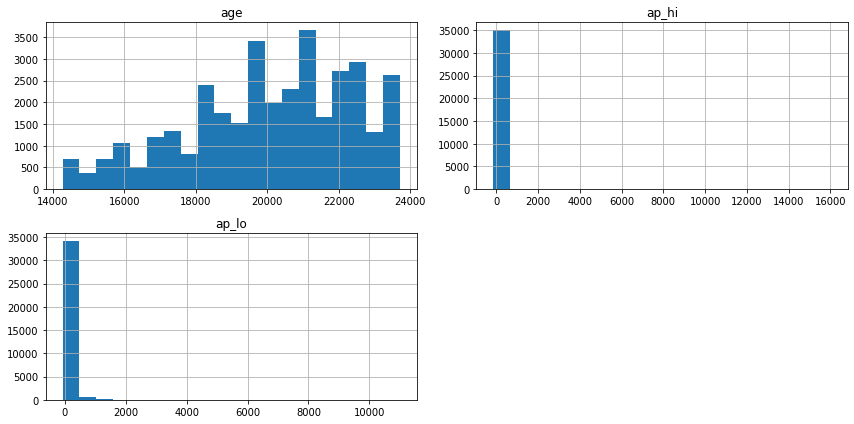

In [88]:
df[df["cardio"] == 1][["age", "ap_hi", "ap_lo"]].hist(bins=20)
plt.tight_layout()

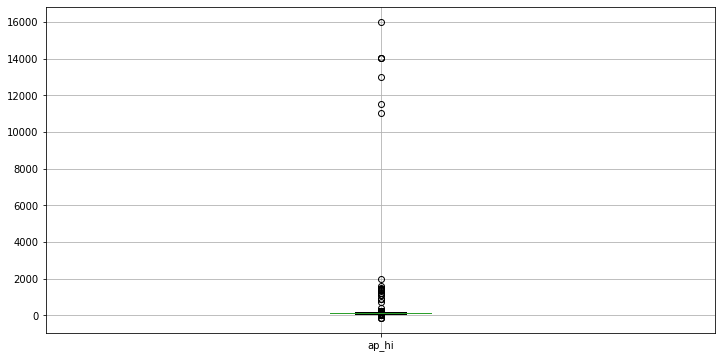

In [89]:
df[df["cardio"] == 1][["ap_hi"]].boxplot();

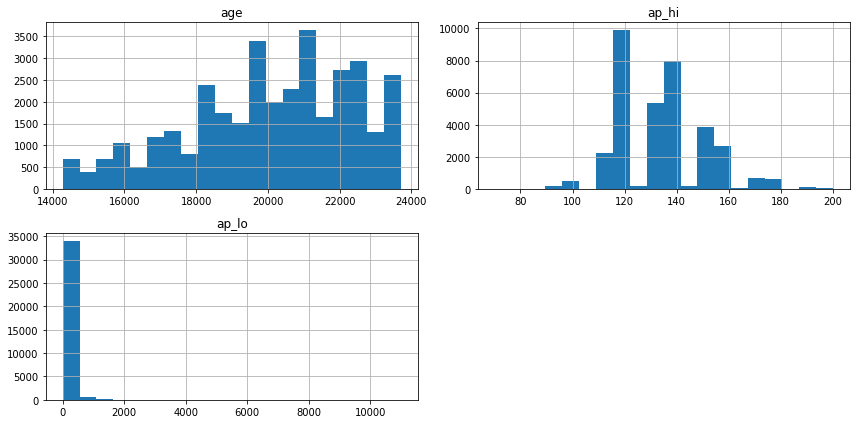

In [90]:
# уберем проблемы с давлением
data = df[(df["ap_hi"] >= 50) & (df["ap_hi"] <= 200)]
data[data["cardio"] == 1][["age", "ap_hi", "ap_lo"]].hist(bins=20)
plt.tight_layout()

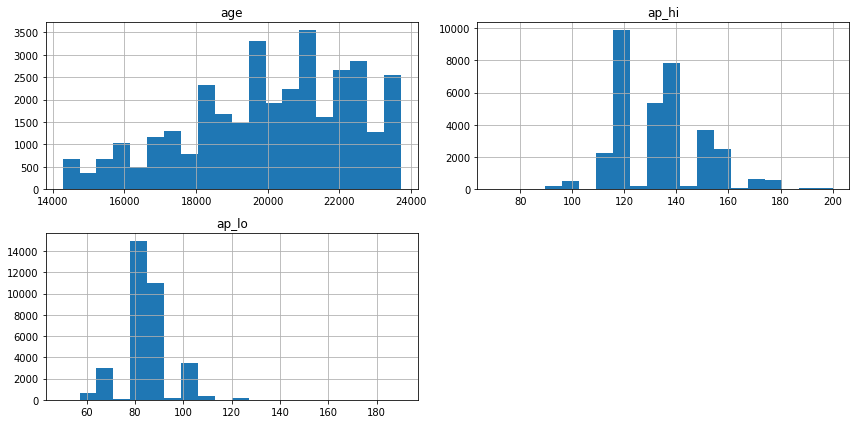

In [91]:
data = data[(data["ap_lo"] >= 50) & (data["ap_lo"] <= 200)]
data[data["cardio"] == 1][["age", "ap_hi", "ap_lo"]].hist(bins=20)
plt.tight_layout()

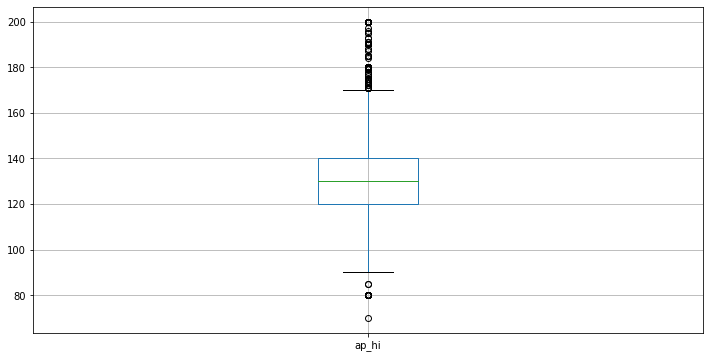

In [50]:
data[data["cardio"] == 1][["ap_hi"]].boxplot();

## Гауссов класификатор

Для непрерывной случайной величины, мы нередко можем сделать предположение, что она распределена по гауссу, в этом случае 

$$
P(x|C_k) = \frac{1}{\sqrt{2\pi  \sigma_k^2}} e^{-\frac{(x-\mu_k)^2}{2\sigma^2_k}}
$$

In [93]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

train = data[["age", "weight", "height"]]
target = data["cardio"]

model = gnb.fit(train, target)
predict = model.predict(train)
print(data.shape[0],
     (target == predict).sum() / data.shape[0])

predict

68703 0.6206279201781582


array([0, 1, 0, ..., 1, 1, 1])

In [52]:
model.predict(train[1:2]), model.predict_proba(train[1:2])

(array([1]), array([[0.38787157, 0.61212843]]))

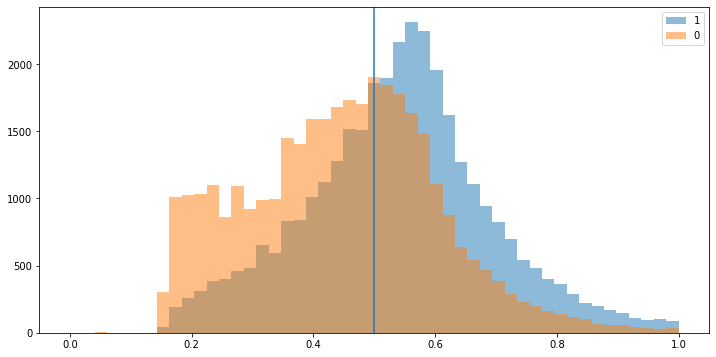

In [78]:
prob = model.predict_proba(train)[:,1]
plt.hist(prob[target == 1], bins=np.linspace(0, 1, 50), alpha=0.5, label="1");
plt.hist(prob[target == 0], bins=np.linspace(0, 1, 50), alpha=0.5, label="0");
plt.axvline(0.5)
plt.legend();

In [68]:
from sklearn.metrics import confusion_matrix

cnf_matrix = confusion_matrix(target, predict)

In [72]:
import itertools
class_names = ["Здоров", "Болен"]
def plot_confusion_matrix(cm, classes, normalize=False, title='Матрица неточностей', cmap=plt.cm.Blues):    
    if normalize:
        cm = cm.astype('float')/cm.sum(axis=0)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.4f' if normalize else 'd'
    thresh = cm.min() + (cm.max() - cm.min()) * 2 / 3.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.ylabel('Истина')
    plt.xlabel('Предсказание')
    plt.tight_layout()

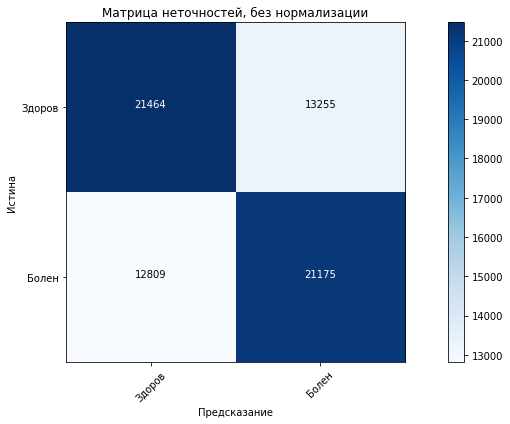

In [73]:
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, 
                      title='Матрица неточностей, без нормализации')
plt.show()

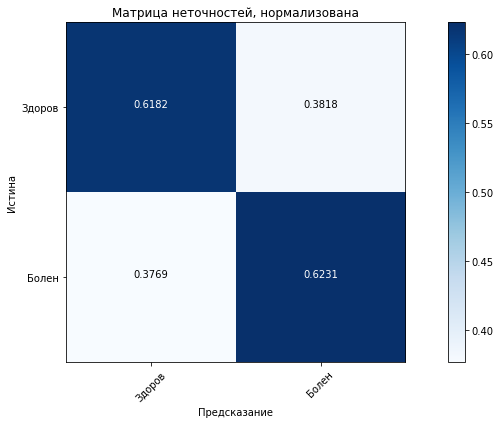

In [74]:
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,                      
                      title='Матрица неточностей, нормализована')
plt.show()

## Ещё немного наивного Байеса

Пакет **sklearn** помимо гауссова класификатора содержит

 * мультиномиальный класификатор __MultinomialNB__ или его чуть более доработанная версия **ComplementNB** (особенно в случае несбалансированных данных). Использует аддитивное сглаживание (additive smoothing). Является расширением биномиального распределения. Подходит для анализа текстов.
 * классификатор на основе распределения Бернулли __BernoulliNB__. Подходит для бинарных признаков.

## Что почитать?

* K.P. Murphy Machine Learning. A Probabilistic Perspective.
* C.E. Rasmussen and C.K.I. Williams. Gaussian Processes for Machine Learning

## Смеси

Нередко, может получатся так, что распределение случайной величины не описывается стандартным распределением.

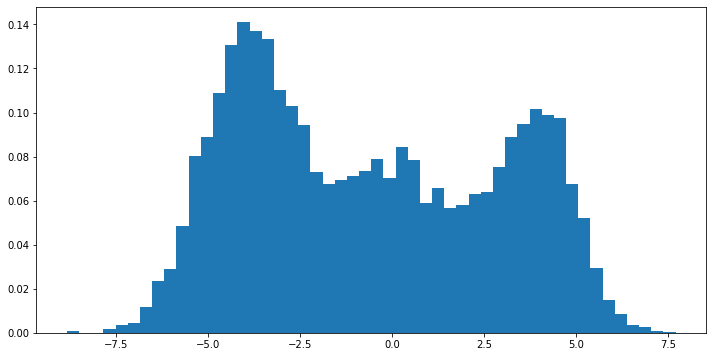

In [76]:
from scipy.stats import norm 
N = 10000 # количество сэмплов
C = 3 # число компонент
weights = [0.4, 0.35, 0.25]
rds = [norm(-4, 1.2), norm(-0, 1.8), norm(4, 1)]
mixture_idx = np.random.choice(C, size=N, replace=True, p=weights)

samples = np.fromiter( (rds[i].rvs() for i in mixture_idx), float)
plt.hist(samples, density=True, bins=50);

Здесь можно увидеть, что итоговое распределение состоит из нескольких нормальных распределений.

В этом случае обычно говорят о том, что мы имеем дело со смесью распределений случайных величин.

$$
f(\vec{x}) = \sum_i \phi_i f_i(\vec{x}|\vec{\theta}_i) \\
\sum_i \phi_i = 1 \\
0 \le \phi_i \le 1
$$
  - $\phi_i$ - априорная вероятность компоненты
  - $f_i$ - плотность распределения компоненты
  - $\vec{\theta_i}$ - набор параметров (скрытые), которые не могут быть получены явным образом из данных

## Gaussian mixture model

Довольно часто на практике используются модели смесей гауссовых распределений

$$
P(\vec{x} | \vec{\theta}) = \sum_i \phi_i \mathcal{N} (\vec{x} | \vec{\mu}_i, \mathbf{\Sigma}_i)
\\
\mathcal{N} (\vec{x} | \vec{\mu}, \mathbf{\Sigma}) = \frac{1}{\sqrt{(2\pi)^d |\mathbf{\Sigma}|}}
\exp\left[
-\frac{1}{2}
(\vec{x} - \vec{\mu})^T 
\mathbf{\Sigma}
(\vec{x} - \vec{\mu})
\right]
$$

Данная модель может быть использована для задач кластеризации или классификации данных.

## Поиск скрытых параметров

Все отлично, мы знаем теперь, что мы работаем со смесью, но как при этом получить значения скрытых параметров из имеющихся данных?

## Метод максимального правдоподобия

На помощь снова приходит метод максимального правдаподобия, нам всего лишь нужно найти значения параметров распределений, которые максимизируют значение функционала

$$
P(x_{1:N}|\vec{\theta}) = \prod_i P(\vec{x}_i|\vec{\theta})
\\
x_{1:N} = x_1, x_2, \ldots, x_N
$$

Здесь используется предположение о том, что каждое измерение $x$ является независимым.

Максимум довольно легко ищется, если у нас небольшое число скрытых параметров, но с увеличением количества этих параметров, сложность значительно повышается.

## EM-алгоритм

EM(Expectation-Maximization) - алгоритм позволяет найти оценку скрытых параметров вероятностных моделей.

Начнем с логарифмической функции правдоподобия

$$
\mathcal{L}(\vec{\theta}|\vec{x}_{1:N}) = \ln P(\vec{x}_{1:N}|\vec{\theta}) = \sum_i \ln P(\vec{x}_i | \vec{\theta})
$$

Введем некий скрытый набор скрытых параметров $z$, который если бы существовал, то значительно облегчил нам жизнь, если бы был известен. В случае смесей, это может быть номер компоненты. 

$$
\mathcal{L}(\vec{\theta}) = \sum_i \ln \sum_{\vec{z}_i} P(\vec{x}_i, \vec{z}_i | \vec{\theta})
$$

Здесь я пользуюсь свойством:

$$
\sum_B P(AB) = P(A)
$$

## Неравенство Йенсена

Приведем небольшую теорему, которая нам пригодится в дальнейшем.

Если функция $f(x)$ - выпукла, $x$ - некая случайная величина, тогда имеет место следующее неравенство

$$
E[f(x)] \ge f(E[x]) 
$$

или для логарифма

$$
\ln(E[x]) \ge E[\ln(x)] 
$$

Или все тоже самое, но в случае явного задания дискретного распределения
 
$$
\sum_i P(x_i) f(x_i) \ge f\left(\sum_i P(x_i) x_i \right)
\\
\ln\left(\sum_i P(x_i) x_i\right) \ge \sum_i P(x_i) \ln(x_i) 
$$

## EM-алгоритм (продолжение)
 
$$
\mathcal L(\vec{\theta}) = \sum_i \ln \sum_{\vec{z}_i} P(\vec{x}_i, \vec{z}_i | \vec{\theta})
$$

Пусть у нас есть какая-то оценка параметров $\vec{\theta}^{(n)}$, то мы можем посчитать распределение 

$$
P(\vec{z}_i | \vec{x}_i, \vec{\theta}^{(n)}) 
$$

Домножим на него и разделим внутри суммы по $\vec{z}_i$ в нашей функции правдоподобия

$$
\mathcal L(\vec{\theta}) 
=
\sum_i \ln \sum_{\vec{z}_i} P(\vec{z}_i | \vec{x}_i, \vec{\theta}^{(n)})   \frac{P(\vec{x}_i, \vec{z}_i | \vec{\theta})}{P(\vec{z}_i | \vec{x}_i, \vec{\theta}^{(n)}) }
$$

Раз у нас есть оценка параметров, то мы можем посчитать $\mathcal L(\vec{\theta}^{(n)})$ и затем рассмотрим разность

$$
\mathcal L(\vec{\theta}) - \mathcal L(\vec{\theta}^{(n)}) = 
\sum_i \ln \sum_{\vec{z}_i} P(\vec{z}_i | \vec{x}_i, \vec{\theta}^{(n)})   \frac{P(\vec{x}_i, \vec{z}_i | \vec{\theta})}{P(\vec{z}_i | \vec{x}_i, \vec{\theta}^{(n)}) } - 
\sum_i \ln P(\vec{x}_i | \vec{\theta}^{(n)})  
$$

$$
\mathcal L(\vec{\theta}) - \mathcal L(\vec{\theta}^{(n)}) = 
\sum_i \ln \sum_{\vec{z}_i} P(\vec{z}_i | \vec{x}_i, \vec{\theta}^{(n)})   \frac{P(\vec{x}_i, \vec{z}_i | \vec{\theta})}{P(\vec{z}_i | \vec{x}_i, \vec{\theta}^{(n)}) P(\vec{x}_i | \vec{\theta}^{(n)})   } 
$$

Несложно заметить, что выражение внутри логарифма совпадает с определением среднего, а значит мы можем воспользоваться неравенством Йенсена

$$
\sum_i \ln \sum_{\vec{z}_i} P(\vec{z}_i | \vec{x}_i, \vec{\theta}^{(n)})   \frac{P(\vec{x}_i, \vec{z}_i | \vec{\theta})}{P(\vec{z}_i | \vec{x}_i, \vec{\theta}^{(n)}) P(\vec{x}_i | \vec{\theta}^{(n)})   } 
\ge 
\sum_i \sum_{\vec{z}_i} P(\vec{z}_i | \vec{x}_i, \vec{\theta}^{(n)}) \ln   \frac{P(\vec{x}_i, \vec{z}_i | \vec{\theta})}{P(\vec{z}_i | \vec{x}_i, \vec{\theta}^{(n)}) P(\vec{x}_i | \vec{\theta}^{(n)})   } 
$$

Введем обозначение

$$
\mathcal l (\vec{\theta}|\vec{\theta}^{(n)}) = \mathcal L(\vec{\theta}^{(n)}) + \sum_i \sum_{\vec{z}_i} P(\vec{z}_i | \vec{x}_i, \vec{\theta}^{(n)}) \ln   \frac{P(\vec{x}_i, \vec{z}_i | \vec{\theta})}{P(\vec{z}_i | \vec{x}_i, \vec{\theta}^{(n)}) P(\vec{x}_i | \vec{\theta}^{(n)})   } 
$$

Тогда из неравенства выше

$$
\mathcal L(\vec{\theta}) 
\ge
\mathcal l (\vec{\theta}|\vec{\theta}^{(n)})
$$

При этом не сложно показать, что 
$$
\mathcal l (\vec{\theta}^{(n)}|\vec{\theta}^{(n)}) = \mathcal L(\vec{\theta}^{(n)})
$$

Таким образом улучшение $\mathcal l (\vec{\theta}|\vec{\theta}^{(n)})$ будет улучшать $\mathcal L(\vec{\theta})$, при этом самое лучшее можно получить так

$$
\vec{\theta}^{(n+1)} = \arg \max_\theta \mathcal l (\vec{\theta}|\vec{\theta}^{(n)})
$$

<div><img style="margin-left:auto; margin-right: auto" src="ltt.png"/></div>

В итоге, мы можем записать выражение (попутно выкинув все, что не зависит от $\vec{\theta}$)

$$
\vec{\theta}^{(n+1)} = \arg \max_\theta \sum_i \sum_{\vec{z}_i} P(\vec{z}_i | \vec{x}_i, \vec{\theta}^{(n)}) \ln   P(\vec{x}_i, \vec{z}_i | \vec{\theta})
$$

# EM-алгоритм

1) __Expectation.__ На данном шаге мы рассчитываем 

$$
P(\vec{z}_i | \vec{x}_i, \vec{\theta}^{(n)}) 
$$

2) __Maximization.__ После мы ищем следующую оценку

$$
\vec{\theta}^{(n+1)} = \arg \max_\theta \sum_i \sum_{\vec{z}_i} P(\vec{z}_i | \vec{x}_i, \vec{\theta}^{(n)}) \ln   P(\vec{x}_i, \vec{z}_i | \vec{\theta})
$$

## Gaussian Mixture Model

Все отлично, но как это работает в жизни

Рассмотрим простейший случай. Пусть у нас есть смесь гауссиан с неизвестными средними значениями и дисперсиями

$$
P(x | \vec{\theta}) = \sum_c \phi_c \mathcal N (x | \mu_c, \sigma_c)
$$

Отсюда мы сразу можем записать несколько выражений

$$
P(x_i | z_i = c, \vec{\theta}) = \mathcal N (x | \mu_c, \sigma_c)
\\
P(z_i = c | \vec{\theta}) = \phi_c
$$

Найдем для начала $P({z}_i | {x}_i, \vec{\theta}^{(n)})$

$$
P(z_i = c | x_i, \vec{\theta}^{(n)}) 
= \frac{ P(x_i|z_i = c, \vec{\theta}^{(n)}) P(z_i = c | \vec{\theta}^{(n)}) } { P(x_i | \vec{\theta}^{(n)}) }
= \frac{ \phi_c^{(n)} \mathcal N (x_i | \mu_c^{(n)}, \sigma_c^{(n)}) } { \sum_k \phi_k^{(n)} \mathcal N (x_i | \mu_k^{(n)}, \sigma_k^{(n)}) }
$$

Будем это обозначать как 

$$
\omega_{ic} = \frac{ \phi_c^{(n)} \mathcal N (x_i | \mu_c^{(n)}, \sigma_c^{(n)}) } { \sum_k \phi_k^{(n)} \mathcal N (x_i | \mu_k^{(n)}, \sigma_k^{(n)}) }
$$

Для успешной максимизации немного перепишем выражение

$$
\ln P(x_i, z_i = c | \vec{\theta}) 
= \\ =
P(x_i|z_i = c, \vec{\theta}) P(z_i = c| \vec{\theta}) 
= \\ =
\ln \phi_c \mathcal N (x_i | \mu_c, \sigma_c) 
= \\ =
\ln\phi_c - \frac{1}{2}\ln\left[2\pi\right] - \ln\sigma_c - \frac{1}{2} \frac{(x_i-\mu_c)^2}{\sigma^2_c}
$$

А теперь нам всего лишь нужно найти экстремум функции (константы можно выкинуть)

$$
\sum_i \sum_{\vec{z}_i} P(\vec{z}_i | \vec{x}_i, \vec{\theta}^{(n)}) \ln   P(\vec{x}_i, \vec{z}_i | \vec{\theta}) \propto \sum_i \sum_c \omega_{ic} \left(
    \ln\phi_c - \ln\sigma_c - \frac{1}{2} \frac{(x_i-\mu_c)^2}{\sigma_c^2}
\right)
$$

Сделать это довольно просто, нам нужно взять первые производные и приравнять их к нулю.

Производная по $\mu_c$

$$
\sum_i \omega_{ic} \left(
   \frac{x_i-\mu_c}{\sigma_c^2}
\right)
=
0
$$

Откуда

$$
\mu_c = \frac{ \sum_i \omega_{ic} x_i } { \sum_i \omega_{ic} }
$$

Для $\sigma_c$ предлагаю проделать самостоятельно, результат будет


$$
\sigma_c^2 =  \frac{ \sum_i \omega_{ic} (x_i - \mu_c)^2 } { \sum_i \omega_{ic} }
$$

А вот для того, чтобы найти $\phi_c$ нужно вспомнить, что у нас есть требование

$$
\sum_c \phi_c = 1
$$

А значит, нам требуется искать условный экстремум. Для этого, нужно всего лишь добавить слагаемое $\beta (\sum_c \phi_c - 1)$ и найти производную от выражения (слагаемые, что не зависят от $\phi_c$ опущены)

$$
\sum_i \sum_c \omega_{ic} \ln\phi_c + \beta (\sum_c \phi_c - 1)
$$

В результате получим

$$
\phi_c = \frac{1}{N} { \sum_i \omega_{ic} }
$$

## Результат

Выберем некое начальное приближение для $\phi_c$, $\mu_c$, $\sigma_c$. Далее наш алгоритм теперь выглядит так

1) Посчитать для текущих значений $\phi_c$, $\mu_c$, $\sigma_c$
$$
\omega_{ic} = \frac{ \phi_c^{(n)} \mathcal N (x_i | \mu_c^{(n)}, \sigma_c^{(n)}) } { \sum_k \phi_k^{(n)} \mathcal N (x_i | \mu_k^{(n)}, \sigma_k^{(n)}) }
$$

2) Обновить значение параметров по порядку
$$
\phi_c = \frac{1}{N} { \sum_i \omega_{ic} }
\\
\mu_c = \frac{ \sum_i \omega_{ic} x_i } { \sum_i \omega_{ic} }
\\
\sigma_c^2 =  \frac{ \sum_i \omega_{ic} (x_i - \mu_c)^2 } { \sum_i \omega_{ic} }
$$

# Пример

phi =  [0.25829611 0.33303984 0.40866404]
mu =  [ 3.97459791 -0.00844798 -3.98376485]
sigma =  [1.01395947 1.68394846 1.20949911]


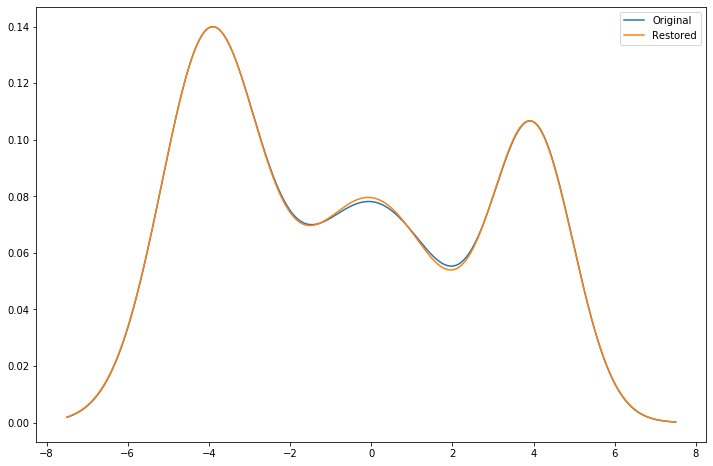

In [5]:
# Задаем начальную оценку

phi = np.array([1/3, 1/3, 1/3]).reshape(-1, 1)
mu = np.array([-1, -2, -3]).reshape(-1, 1)
sigma = np.array([1, 1, 1]).reshape(-1, 1)
ss = samples[:].reshape(1, -1)
N = ss.shape[1]

# Поиск истинных значений

for _ in range(100):
    # E - шаг
    omega = phi * norm.pdf(ss, loc=mu, scale=sigma)
    tmp = np.sum(omega, axis=0, keepdims=True)
    omega = omega / tmp
    
    s_omega = np.sum(omega, axis=1, keepdims=True)
    
    # M -  шаг
    phi = s_omega / N 
    mu = np.sum(omega * ss, axis=1, keepdims=True) / s_omega
    sigma = np.sqrt(np.sum(omega * (ss - mu)**2, axis=1, keepdims=True) / s_omega)

# Вывод результата
print( "phi = ", phi.ravel() )
print( "mu = ", mu.ravel() )
print( "sigma = ", sigma.ravel() )
    
x = np.linspace(-7.5, 7.5, 1000)
y1 = 0.4*norm.pdf(x, loc=-4, scale=1.2) + 0.35*norm.pdf(x, loc=0, scale=1.8) + 0.25*norm.pdf(x, loc=4, scale=1.0)
y2 = np.sum(phi*norm.pdf(x, loc=mu, scale=sigma), axis=0)

plt.figure(figsize=(12, 8))
plt.plot(x, y1, label="Original")
plt.plot(x, y2, label="Restored")
plt.legend()
plt.show()

# phi [0.4, 0.35, 0.25]
# mu = [-4, 0, 4]
# sigma = [1.2, 1.8, 1.0] 

# GaussianMixture в SKLearn

In [82]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.mixture import GaussianMixture

def scatter(data, target, components, outer=0.1):
    x_min, x_max = data[:, 0].min(), data[:, 0].max()
    x_w = x_max - x_min
    y_min, y_max = data[:, 1].min(), data[:, 1].max()
    y_w = y_max - y_min
    xx, yy = np.meshgrid(
        np.arange(x_min - x_w * outer, x_max + x_w * outer, 0.05),
        np.arange(y_min - y_w * outer, x_max + y_w * outer, 0.05),
    )

    model = GaussianMixture(n_components=components)
    model.fit(data)
        
    predict = model.predict(np.stack([xx.ravel(), yy.ravel()], axis=1))
    plt.pcolormesh(xx, yy, predict.reshape(xx.shape), cmap=plt.get_cmap("Wistia"))
    plt.scatter(data[:, 0], data[:, 1], c=target/np.max(target), 
                cmap=plt.get_cmap("Wistia"),
                edgecolors='k', s=50, vmin=0, vmax=1);
    plt.show()

In [83]:
train1 = np.random.normal(size=(100, 2))
train2 = np.random.normal(2, size=(100, 2))
train3 = np.random.normal((-1, 3), size=(100, 2))
data = np.vstack([train1, train2, train3])
target = np.hstack([np.zeros(train1.shape[0]), np.ones(train2.shape[0]), np.full(train3.shape[0], 2)])
target[-3:]

array([2., 2., 2.])

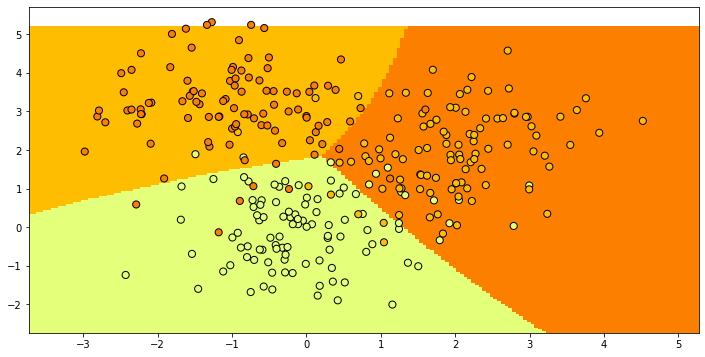

In [84]:
scatter(data, target, 3)

# Анализ текстов

Пусть у нас есть 
* $D$ - множество документов
* $W$ - множество слов (токенов), образующих словарь

Каждый документ $d \in D$ состоит из последовательности слов $w_1, w_2, \ldots$

# Гипотеза о существование тем

Предположим, что появление слова в документе связано с некой темой $t$ из наперед заданного множества тем $T$. Темы ненаблюдаемы.

# Bag of Words

Сделаем очень сильное заявление - __порядок слов в документе не важен__. Это явно не так, но с этим заявлением с документами становится работать на много проще.

Документ $d$ в этом случае представлен числом вхождений $n_{wd}$ слов $w$ 

# Модель

В итоге мы можем получить распределение (если бы нам были известны темы)

$$
P(d, w, t) = \frac{1}{N} \sum_n [d_n = d][w_n = w][t_n = t]
$$

Предположим, что появление слов в документе не зависит от самого документа, а зависит только от темы

$$
P(w | d, t) = P(w | t)
$$

В итоге модель описывающая появление слов в документе

$$
P(w | d) = \sum_t P(w | t, d) P(t | d) = \sum_t P(w | t) P(t | d)
$$

где обычно вводят обозначения (по факту это матрицы)

$$
\phi_{wt} = P(w | t)
\\
\theta_{td} = P(t | d)
\\
P(w | d) = \sum_t \phi_{wt} \theta_{td}
$$

Обычно стоит задача найти $\phi_{wt}$ и $\theta_{td}$ по заданному набору $D$, тогда отсюда можно будет найти распределения $P(t | w)$, $P(t | d)$ и $P(t | w, d)$

## Решение через EM

Оценки вероятностей мы можем найти достаточно просто, мы их просто можем посчитать на основе $D$

$$
P(d, w) = \frac{N_{dw}}{N}
\\
P(d) = \frac{N_d}{N}
\\
P(w) = \frac{N_w}{N}
\\
P(w|d) = \frac{N_{dw}}{N_d}
$$

Оценки вероятностей связанных с темами выражаются не сложнее, но при этом явно посчитать их нельзя в силу ненаблюдаемости темы
$$
P(t) = \frac{N_{t}}{N}
\\
P(w | t) = \frac{N_{wt}}{N_t}
\\
P(t | d ) = \frac{N_{td}}{N_d}
\\
P(t|d ,w) = \frac{N_{tdw}}{N_{dw}}
$$

Если бы нам было известно $N_{tdw}$, то мы могли бы расчитать все остальные распределения. Если бы нам были известны все параметры, то найти это несложно

$$
P(t|d, w) = \frac{ P(t, w | d) } {P(w|d)} = \frac{ P(w|t) P(t|d) } {P(w|d)} 
= \frac{ \phi_{wt} \theta_{td} }{\sum_{t'} \phi_{wt'} \theta_{t'd}  }
$$

Выразим все остальное

$$
\phi_{wt} = \frac{ P(w, t) } { P(t) } = \frac{ \sum_d P(t | d, w) P(d, w) }{ \sum_w \sum_d  P(t | d, w) P(d, w) }
= \frac{ \sum_d P(t | d, w) N_{dw} }{ \sum_w \sum_d  P(t | d, w) N_{dw} }
$$

$$
\theta_{td} = \frac{ P(t, d) } {P(d)} = \frac{ \sum_w P(t | d, w) P(d,w) } {\sum_t \sum_w P(t | d, w) P(d, w) } 
= \frac{ \sum_w P(t | d, w) N_{dw} } {\sum_t \sum_w P(t | d, w) N_{dw} } 
$$

Фактически оценка $P(t|d,w)$ на основе фиксированных параметров и набора документов - это E-шаг.
Обновление параметров модели на основе вычисленной оценки $P(t|d,w)$ - это M-шаг.

Фактически, мы получили pLSA (Probabilistic latent semantic analysis). Из минусов - довольно большое число параметров и при добавлении нового документа нужно перестраивать модель.

# Latent Dirichlet allocation

Улучшенной версией pLSA является латентное размещение Дирихле. В данном подходе предпологается, что априорное распределение тем подчиняется распределению Дирихле

$$
Dir(\vec{\theta_d}, \vec{\alpha}) = \frac{ \Gamma\left(\sum_t \alpha_t\right) } { \prod_t \Gamma(\alpha_t) } \prod_t \theta_{td}^{\alpha_t - 1} 
\\ 
Dir(\vec{\phi_t}, \vec{\beta}) = \frac{ \Gamma\left(\sum_w \beta_w \right) } { \prod_w \Gamma(\beta_w) } \prod_w \phi_{wt}^{\beta_w - 1} 
$$

Искать параметры модели можно через EM или сэмплирование по Гиббсу.

## Пример

In [53]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.datasets import fetch_20newsgroups

dataset = fetch_20newsgroups(shuffle=True, random_state=1, remove=('headers', 'footers', 'quotes'))

In [175]:
n_features = 1000
ND = 2000
T = 10
samples = dataset.data[:ND]

vectorizer = CountVectorizer(max_df=0.95, min_df=2,
                             max_features=n_features,
                             stop_words='english')

tf = vectorizer.fit_transform(samples)
print(list(vectorizer.vocabulary_.items())[:10])
print(tf[0].toarray())

[('sure', 881), ('story', 867), ('did', 286), ('statement', 862), ('media', 587), ('pro', 717), ('israeli', 488), ('world', 988), ('having', 432), ('letter', 527)]
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 

In [176]:
from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(n_components=T, max_iter=10,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=0)
lda.fit(tf)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='online', learning_offset=50.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=10, n_jobs=None,
                          perp_tol=0.1, random_state=0, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)

In [177]:
feature_names = vectorizer.get_feature_names()

def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()
    
print_top_words(lda, feature_names, 10)

Topic #0: edu com mail send graphics ftp pub available contact university
Topic #1: don like just know think ve way good right use
Topic #2: think christian atheism book pittsburgh faith new just radio like
Topic #3: drive windows disk thanks use card drives hard using software
Topic #4: hiv health aids april disease care medical research information 1993
Topic #5: god people does just jesus good say don law life
Topic #6: 55 10 11 game 15 18 team 12 19 period
Topic #7: car year new cars bike just good engine like oil
Topic #8: people said didn did know just went time like came
Topic #9: key space government public law use encryption section earth security



# Марковские модели

Пусть у нас есть система с конечным числом исходов. При этом вероятность перехода из текущего состояния в следующее зависит только от текущего состояния и не зависит от прошлого.

То есть фактически

$$
P(x_{n+1} = i_{n+1} | x_{n} = i_{n}, x_{n-1} = i_{n-1}, \ldots, x_{0} = i_{0}) = P(x_{n+1} = i_{n+1} |  x_{n} = i_{n})
$$

<img src="https://www.kdnuggets.com/wp-content/uploads/strika-martin-2.png">

# Скрытые марковские модели

Представим, что мы наблюдаем какую-то случайную величину. Мы можем сделать предположение, что вероятность наблюдения тех или иных ее значений может зависить от какого-то неизвестного внутреннего состояния. Пусть это внутреннее состояние будет марковским процессом. При этом, если бы знали это внутреннее состояние, то наша жизнь стала бы значительно проще.

Такие модели называют скрытыми марковскими моделями (Hidden Markov Model или HMM)

<div style="background:white">
<img src="https://upload.wikimedia.org/wikipedia/commons/8/83/Hmm_temporal_bayesian_net.svg">
    </div>

Чем же характеризуется скрытая марковская модель

* $x_t$ - случайная величина в момент времени $t$, может принимать $\Omega$ возможных значений
* $z_t$ - внутреннее состояние системы в момент времени $t$, может находится в $K$ состояниях
* $\vec{\pi} = P(z_0)$ - вектор вероятностей начальных состояний ($K \times 1$)
* $A_{ij} = P(z_{t+1} = j | z_{t} = i)$ - матрица вероятностей перехода ($K \times K$)
* $B_{kj} = B_j(x_t) = P(x_t = k | z_t = j)$ - матрица вероятностей наблюдений ($\Omega \times K$)

или кратко

$$
\lambda = (\mathbf A, \mathbf B, \vec{\pi})
$$

# Задачи скрытых марковских моделей

Для успешного применения HMM требуется для начала решить три проблемы

1. Найти вероятность последовательности измерений при известной модели
2. Найти самое вероятную последовательность внутренних состояний при известной модели
3. Найти параметры модели по последовательности наблюдений

## Задача 1 (Forward-Backward)

> Пусть у нас есть последовательность измерений $x_1, x_2, \ldots, x_T$. Какова вероятность получить данную последовательность при известной модели $\lambda = (\mathbf A, \mathbf B, \vec{\pi})$?

Чтобы решить данную задачу нам нужно посчитать $P(x_{1:T})$

$$
P(x_{1:T}) = \sum_{z_{1:T}} P(x_{1:T}, z_{1:T})
$$

Но это довольно трудоемкая операция, которую значительно можно упростить с помощью динамического программирования. Для этого рассмотрим следующую величину:
$$
P(x_{1:t}, z_t = j) = \alpha_t(j)
$$

Достаточно очевидно, что 
$$
\sum_j P(x_{1:t}, z_t = j) = P(x_{1:t})
$$


Попробуем её рассчитать для $t=1$:
$$
P(x_1, z_t = j) = P(x_1| z_1 = j) P(z_1 = j) = \pi_j B_j(x_1) 
$$

Далее рассмотрим $t=2$

$$
P(x_1, x_2, z_2 = j) = \sum_i P(x_1, z_1 = i) P(x_2 | z_2) P(z_1 = i | z_2 = j)
=\\= 
B_j(x_2) \sum_i A_{ij} \alpha_1(i)
$$

И мы можем это сделать для любого $t$
$$
\alpha_t(j) =  \sum_i \alpha_{t-1}(i) A_{ij}  B_j(x_t) 
$$

## Резюме алгоритма Forward

В итоге получаем довольно простой алгоритм

1) Расчитываем первое значение
$$
\alpha_1(j) = \pi_j B_{j}(x_1) 
$$

2) Расчитываем каждое последующее
$$
\alpha_t(j) = B_j(x_t) \sum_i \alpha_{t-1}(i) A_{ij} 
$$

3) Расчитываем вероятность всей последовательности
$$
P(x_1, \ldots, x_T) = \sum_i \alpha_T(i)
$$

## Backward

Мы можем проделать тоже самое, но с конца последовательности, для этого нужно рассмотреть лишь

$$
\beta_t(j) = P(x_{t+1:T}, z_t = j)
$$

При этом
$$
\beta_T(j) = 1
\\
P(x_{1:T}) = \sum_j P(x_{1:T}, z_t = j) = \sum_j P(x_{1:t}, z_t = j) P(x_{t+1:T}, z_t = j)
= \\ =\sum_j \alpha_t(j) \beta_t(j)
$$

## Резюме алгоритма Backward

1) Расчитываем первое значение
$$
\beta_T(i) = 1
$$

2) Расчитываем каждое последующее
$$
\beta_t(j) =  \sum_j A_{ij}  B_j(x_{t+1}) \beta_{t+1}(j) 
$$

3) Расчитываем вероятность всей последовательности
$$
P(x_1, \ldots, x_T) = \sum_i \pi_i B_i(x_1) \beta_1(i)
$$

## Задача 2 (Витерби алгоритм)

>Пусть у нас есть последовательность измерений $x_1, x_2, \ldots, x_T$. Какая наиболее вероятная последовательность $z_1, z_2, \ldots, z_T$ при известной модели $\lambda = (\mathbf A, \mathbf B, \vec{\pi})$?

То есть нам нужно найти

$$
Z^* = \arg\max_Z P(x_{1:T}, z_{1:T}|\lambda)
$$

Ее также можно решить с помощью методов динамического программирования. Формально, вероятность нахождения в состояние $z_t = j$ можно представить как

$$
\nu_t(j) = \max_{z_{t:t-1}} P(x_{1:t}, z_{1:t-1}, z_t = j)
$$

как и все хорошее в динамическом программированиы, мы можем выразить рекурсивно это выражение через предыдущее значение 

$$
v_t(j) = \max_i \nu_{t-1}(i) A_{ij} b_j(x_t)
$$

Если попутно сохранять пути, то можно восстановить путь (последовательность) по которой мы пришли к максимальному значению, по сути мы должны просто дополнительно хранить

$$
ptr_t(j) = \arg \max_i \nu_{t-1}(i) A_{ij} b_j(x_t)
$$

## Резюме алгоритма Витерби

1) Инициализация
$$
\nu_1(j) = \pi_j B_j(x_1)\\
ptr_1(j) = 0
$$

2) Расчет
$$
\nu_t(j) = \max_i \nu_{t-1}(i) A_{ij} B_j(x_t)\\
ptr_t(j) = \arg\max_i \nu_{t-1}(i) A_{ij} B_j(x_t)
$$

3) Финал
$$
P(x_{1:T}, z_{1:T} | \lambda) = \max_i \nu_T(i) \\
z_T = \arg\max_i \nu_T(i)
$$

## Задача 3 (Баума Велша алгоритм)

>Пусть у нас есть последовательность измерений $x_1, x_2, \ldots, x_T$. Необходимо подобрать параметры $A_{ij}$ и $B_j(x_t)$.

Чтобы решить данную задачу, нам нужно найти максимально возможную функцию правдоподобия от параметров $A$ и $B$
$$
\vec{\pi}^*, \mathbf{A}^*, \mathbf{B}^* = \arg\max_{\vec{\pi}, \mathbf{A},\mathbf{B}} P(x_{1:T}|\vec{\pi}, \mathbf{A},\mathbf{B})
$$

А вот данную задачу мы будем решать уже известным нам методом Expectation-Maximization.

Для расчета $A_{ij}$ мы могли бы посчитать количество переходов $(i \to j)$. Так что в качестве первого шага рассмотрим вероятность перехода в момент времени $t$

$$
\xi_t(i,j) = P(z_t = i, z_{t+1} = j | x_{1:T}, \lambda)
$$

Но для начала посчитаем 
$$
\xi^*(i, j) 
= \\ = 
P(z_t = i, z_{t+1} = j, x_{1:T} | \lambda) 
= \\ =
P(x_{1:t}, z_t = i) P(z_t = i, z_{t+1} = j) P(x_{t+1}|z_{t+1} = j) P(x_{t+1:T}, z_{t+1} = j)
$$

Или в наших обозначениях

$$
\xi^*(i, j) = \alpha_t(i) A_{ij} B_j(x_{t+1})\beta_{t+1}(j)
$$

А теперь по определению условной вероятности мы можем просто получить

$$
\xi_t(i,j) 
= \\ = 
P(z_t = i, z_{t+1} = j | x_{1:T}, \lambda) 
= \\ = 
\frac{P(z_t = i, z_{t+1} = j, x_{1:T} | \lambda)} {P(x_{1:T}|\lambda)}
$$

При этом легко посчитать
$$
P(x_{1:T}|\lambda) = \sum_j \alpha_t(j) \beta_t(j)
$$

$$
\xi_t(i,j)  = \frac{\alpha_t(i) A_{ij} B_j(x_{t+1})\beta_{t+1}(j)} {\sum_j \alpha_t(j) \beta_t(j)}
$$

Теперь можем оценить вероятность переход (фактически делим число переходов $i \to j$ на число всех переходов из $i$)

$$
\hat{A}_{ij} = \frac{ \sum_t \xi_t(i,j) }{  \sum_k \sum_t \xi_t(i, k) }
$$

Превратим все множество значений $x$ в некий словарь и будем сопоставлять его значения с неким значением $\nu_k$. Следовательно по определению

$$
\hat{B}_j(\nu_k) = \frac{\text{количество } \nu\,\, { в состоянии } \,\,j}{\text{количество в состоянии } \,\,j}
$$

Для этого нам нужно знать вероятность нахождения в состоянии $z_t = j$ 

$$
\gamma_t(j) = P(z_t = j|x_{1:T}, \lambda) = \frac{ P(z_t = j, x_{1:T} | \lambda) } { P(x_{1:T}|\lambda) }
$$

$$
\gamma_t(j) = \frac{\alpha_t(j) \beta_t(j)} {\sum_j \alpha_t(j) \beta_t(j)}
$$

В итоге
$$
\hat{B}_j(\nu_k) = \frac{
\sum_t \delta_{\nu_k, x_t} \gamma_t(j)
}{
\sum_t \gamma_t(j)
}
$$
$$
\delta_{\nu_k, x_t} =
\begin{cases}
1 & , x_t \in \nu_k,\\
0 & , x_t \notin \nu_k,\\
\end{cases}
$$

# Алгоритм Баума Велша

1. Инициализация $\mathbf{A}$, $\mathbf{B}$, $\vec{\pi}$
2. Расчитываем $\alpha_t$ и $\beta_t$
3. Расчитываем вспомогательные значения
$$
\gamma_t(j) = \frac{\alpha_t(j) \beta_t(j)} {\sum_j \alpha_t(j) \beta_t(j)}
\\
\xi_t(i,j)  = \frac{\alpha_t(i) A_{ij} B_j(x_{t+1})\beta_{t+1}(j)} {\sum_j \alpha_t(j) \beta_t(j)}
$$
4. Обновляем оценки наших параметров
$$
\pi_i = \gamma_t(i)
\\
\hat{A}_{ij} = \frac{ \sum_t \xi_t(i,j) }{  \sum_k \sum_t \xi_t(i, k) }
\\
\hat{B}_j(\nu_k) = \frac{
\sum_t \delta_{\nu_k, x_t} \gamma_t(j)
}{
\sum_t \gamma_t(j)
}
$$

# Пример

Давайте сгенерируем какой-нибудь простенький марковский процесс, обучим на нем нашу модель и попробуем восстановить внутреннее состояние этого процесса.

In [220]:
import numpy as np
from scipy.stats import norm

# дискретизация непрерывного распределения на указанных бинах
# возвращает размерность len(bins) + 2
# при этом [0] соответствует x < bins[0]
# при этом [len(bins)] соответствует x >= bins[-1]
def HistDistr(bins, distr):
    hist = np.zeros(len(bins) + 1, dtype=np.double)
    hist[0] = distr.cdf(bins[0])
    hist[-1] = distr.cdf(1 - bins[-1])
    for idx, (a, b) in enumerate(zip(bins[:-1], bins[1:])):
        hist[idx + 1] = distr.cdf(b) - distr.cdf(a)
    return hist / np.sum(hist)

# создание центральных значений бинов 
# края 0 и len(bins) устанавливаются NaN (там и правда нельзя найти середину)
def BinToX(bins):
    x = np.zeros(len(bins) + 1)
    x[0] = np.nan
    x[-1] = np.nan
    for idx, (a, b) in enumerate(zip(bins[:-1], bins[1:])):
        x[idx + 1] = (b + a) * 0.5 
    return x

# Создать последовательность внутренних состояний
def GenerateZ(T, P, A):
    N = P.ravel().shape[0]
    Z = np.zeros(T, dtype=np.int)
    
    Z[0] = np.random.choice(N, p=P)
    for t in range(1, T):
        Z[t] = np.random.choice(N, p=A[Z[t-1]].ravel())
    return Z
   
# Создать последовательность наблюдений из внутренних состояний
def GenerateX(Z, B):
    N = B.shape[0]
    K = B.shape[1]
    Z = Z.ravel()
    T = Z.shape[0]
    
    X = np.zeros(T, dtype=np.int)
    
    for t in range(T):
        X[t] = np.random.choice(K, p=B[Z[t]].ravel())
    return X

In [221]:
# бины наших распределений 
bins = np.linspace(-8, 8, 15)

A = np.array([
    [0.99, 0.009, 0.001],
    [0.005, 0.99, 0.005],
    [0.001, 0.009, 0.99]
])

P = np.array([
    1/3,
    1/3,
    1/3,
])

B = np.array([
    HistDistr(bins, norm(-2, 2)),
    HistDistr(bins, norm(0, 1.5)),
    HistDistr(bins, norm(1, 0.2)),
])

(1000,) [2 2 2 2 2 2 2 2 2 2]
(1000,) [8 8 8 8 8 8 8 9 8 8]


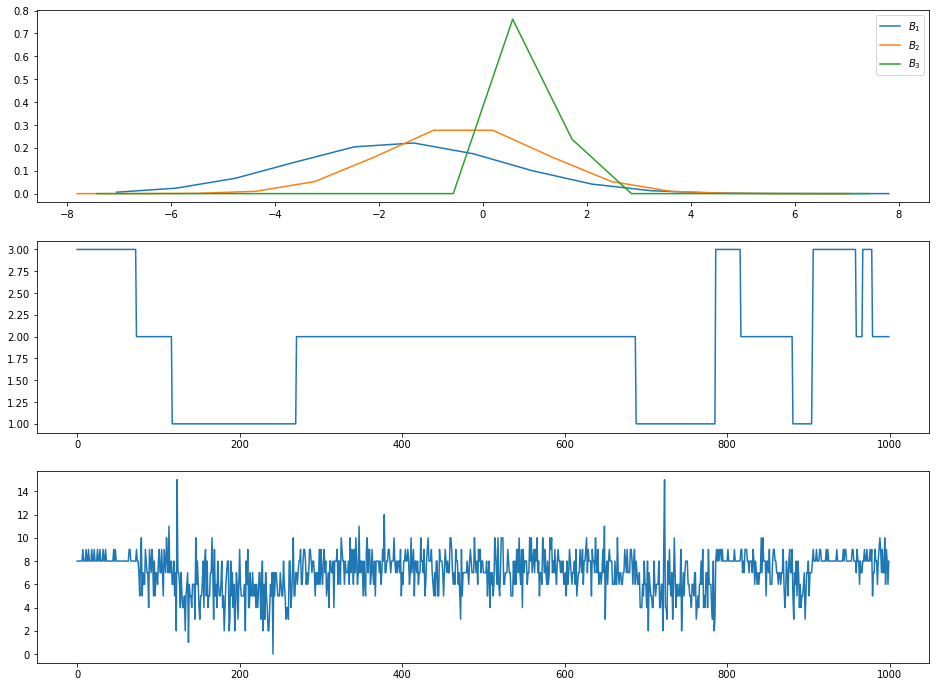

In [222]:
%matplotlib inline
import matplotlib.pyplot as plt

# Число отсчетов по времени
T = 1000
# Число состояний
N = P.shape[0]

Z = GenerateZ(T, P, A)
print(Z.shape, Z[:10])

X = GenerateX(Z, B)
print(X.shape, X[:10])
    
plt.figure(figsize=(16,12))
plt.subplot(311)
w = (bins[1] - bins[0])/3
x = BinToX(bins)[1:-1]
plt.plot(x + w, B[0][1:-1], label="$B_1$")
plt.plot(x - w, B[1][1:-1], label="$B_2$")
plt.plot(x + 0, B[2][1:-1], label="$B_3$")
plt.legend()

plt.subplot(312)
plt.plot(Z + 1)

plt.subplot(313)
plt.plot(X)
plt.show()

# Forward-Backward

Если мы попытаемся воспользоваться данным алгоритмом в лоб, то получим численонеустойчивую реализацию. Вместо этого, мы будет везде считать логарифмы интересующих нас величин. Дополнительно воспользуемся формулой суммирования

$$
\ln\left(e^{x} + e^{y}\right) = 
x + \ln(1 + e^{y - x})
$$

Она доступна в Numpy
```python
np.logaddexp(a, b)
```

In [223]:
def calc_beta(X, P, A, B):
    N = P.shape[0]
    T = X.shape[0]
    
    beta = np.full((T, N), -np.inf)
    beta[T - 1] = 0
    
    logA = np.log(A)
    logB = np.log(B)
    
    for t in range(T - 2, -1, -1):
        tmp = logA + beta[t + 1] + logB[:, X[t + 1]]
        for j in range(N):
            beta[t] = np.logaddexp(beta[t], tmp[:, j].ravel())
    
    prob = -np.inf
    for i in range(N):
        prob = np.logaddexp(prob, beta[0][i] + logB[i, X[0]] + np.log(P[i]))
    return beta, prob
    

def calc_alpha(X, P, A, B):
    N = P.shape[0]
    T = X.shape[0]
    
    alpha = np.full((T, N), -np.inf)
    alpha[0] = np.log(P * B[:, X[0]].ravel())
    
    logA = np.log(A)
    logB = np.log(B)

    for t in range(1, T):
        tmp = logA + alpha[t-1].reshape(-1, 1)
        for i in range(N):
            alpha[t] = np.logaddexp(alpha[t], tmp[i, :].ravel())
        alpha[t] += logB[:, X[t]].ravel()
    
    prob = -np.inf
    for i in range(N):
        prob = np.logaddexp(prob, alpha[-1][i])
        
    return alpha, prob

alpha, lnP = calc_alpha(X, P, A, B)
print(lnP)
beta, lnP = calc_beta(X, P, A, B)
print(lnP)

prob = np.full(alpha.shape[0], -np.inf)
for i in range(alpha.shape[1]):
    prob = np.logaddexp(prob, alpha[:, i] + beta[:, i])
print(prob[:10])
print(prob[-10:])

-1664.541563671346
-1664.5415636713476
[-1664.54156367 -1664.54156367 -1664.54156367 -1664.54156367
 -1664.54156367 -1664.54156367 -1664.54156367 -1664.54156367
 -1664.54156367 -1664.54156367]
[-1664.54156367 -1664.54156367 -1664.54156367 -1664.54156367
 -1664.54156367 -1664.54156367 -1664.54156367 -1664.54156367
 -1664.54156367 -1664.54156367]


# Viterbi

Здесь мы точно также рассматриваем значения логарифмом вместо самих величин

0.024


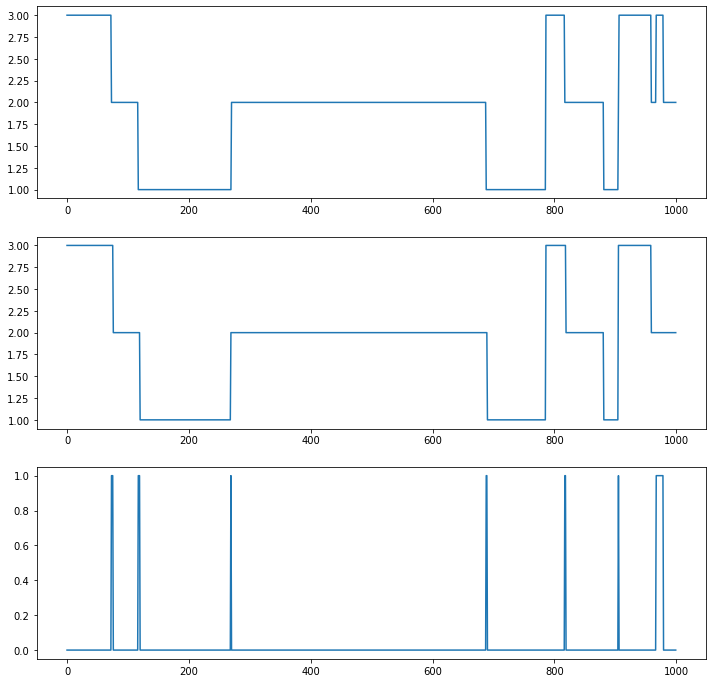

In [224]:
def Viterbi(X, P, A, B):
    N = P.shape[0]
    T = X.shape[0]
    
    v = np.zeros(shape=(T, N))
    ptr = np.zeros(shape=(T, N))
    
    v[0] = np.log(P * B[:,X[0]])
    
    for t in range(1, T):
        tmp = v[t - 1].reshape(-1, 1) + np.log(A * B[:, X[t]].reshape(1, -1))
        ptr[t] = np.argmax(tmp, axis=0)
        v[t] = np.max(tmp, axis=0)

    z = np.zeros(T, dtype=np.int)
    z[-1] = np.argmax(v[T - 1].ravel())
    
    for t in range(T - 2, -1, -1):
        z[t] = ptr[t+1][z[t+1]]

    return z
    
Zs = Viterbi(X, P, A, B)

print(np.sum(np.abs(Zs - Z))/ T)

plt.figure(figsize=(12,12))
plt.subplot(311)
plt.plot(Z + 1)
plt.subplot(312)
plt.plot(Zs + 1)
plt.subplot(313)
plt.plot(np.abs(Zs-Z))
plt.show()

# Baum Welche

Все вычисления также проводим в логарифмическом масштабе

In [234]:
def BaumWelche(X, N):
    # Инициализируем нашу модель
    As = np.random.rand(N, N) 
    As = As/np.sum(As, axis=1, keepdims=True) # нормировка
    As = As.astype(dtype=np.double)

    Bs = np.random.rand(N, np.max(X) + 1)
    Bs = Bs/np.sum(Bs, axis=1, keepdims=True) # нормировка
    Bs = Bs.astype(dtype=np.double)

    Ps = np.random.rand(N)
    Ps = Ps / np.sum(Ps)
    Ps = Ps.astype(dtype=np.double)
    
    T = X.shape[0]
    
    last = -np.inf
    counter = -1
    while True:
        counter += 1
        
        alpha, lnPa = calc_alpha(X, Ps, As, Bs)
        beta, lnPb = calc_beta(X, Ps, As, Bs)
        
        lnPavg = (lnPa + lnPb) * 0.5
        
        gamma = []
        for a, b in zip(alpha, beta):
            gamma.append(a + b - lnPavg)
                
        xi = []
        
        for t in range(0, T - 1):
            xi.append(np.zeros((N, N)))
            
            for i in range(N):
                for j in range(N):
                    xi[-1][i,j] = alpha[t][i] + np.log(As[i, j]) + beta[t+1][j] + np.log(Bs[j, X[t+1]]) - lnPavg
        
        Ps = np.exp(gamma[0])
        As = np.zeros( (N, N), dtype=np.double)
        for i in range(N):
            for j in range(N):
                top = -np.inf
                bottom = -np.inf
                for t in range(T - 1):
                    top = np.logaddexp(top, xi[t][i, j])

                    for k in range(N):
                        bottom = np.logaddexp(bottom, xi[t][i, k])
                As[i,j] = np.exp(top - bottom)
                
        for j in range(N):
            Sgamma = -np.inf
            for t in range(T):
                Sgamma = np.logaddexp(Sgamma, gamma[t][j])

            for k in range(Bs.shape[1]):
                Bs[j][k] = -np.inf
            
            for t in range(T):
                Bs[j][X[t]] = np.logaddexp(Bs[j][X[t]], gamma[t][j])
            for k in range(Bs.shape[1]):
                Bs[j][k] = np.exp(Bs[j][k] - Sgamma)
        
        eps = (lnPavg - last) / lnPavg
        last = lnPavg
        if counter % 25 == 0:
            print("%4d" % counter, "%15.4f" % lnPavg, eps)
        if np.abs(eps) < 0.00000001:
            break
    return Ps, As, Bs
        
Ps, As, Bs = BaumWelche(X, 3)
Zs = Viterbi(X, Ps, As, Bs)
print("DONE")

   0      -2815.3396 -inf
  25      -1732.5853 -0.00231168653627912
  50      -1651.4481 -1.721913574936446e-08
DONE


0.006


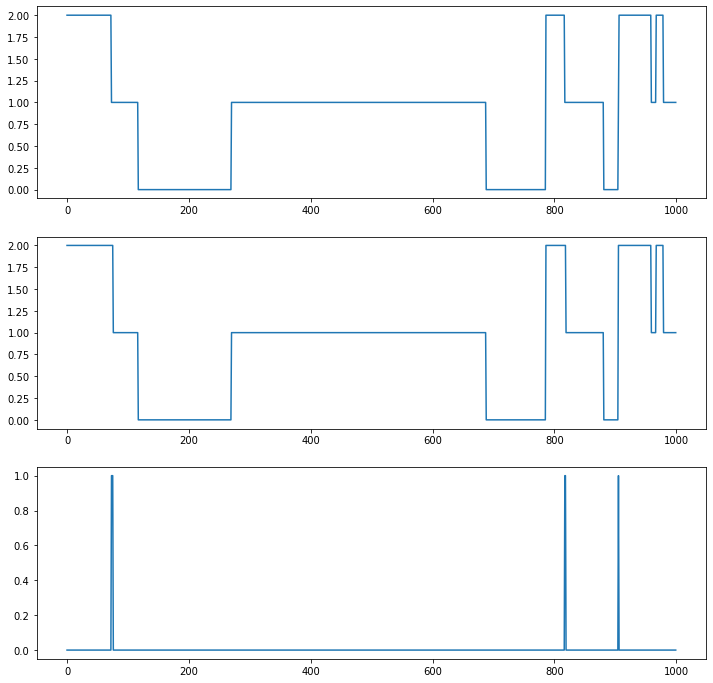

In [235]:
Zs0 = Zs == 0
Zs1 = Zs == 1
Zs2 = Zs == 2
Zss = np.copy(Z)
Zss[Zs0] = 2
Zss[Zs2] = 0

print(np.sum(np.abs(Zss-Z)) / T)
plt.figure(figsize=(12,12))
plt.subplot(311)
plt.plot(Z)
plt.subplot(312)
plt.plot(Zss)
plt.subplot(313)
plt.plot(np.abs(Zss-Z))
plt.show()

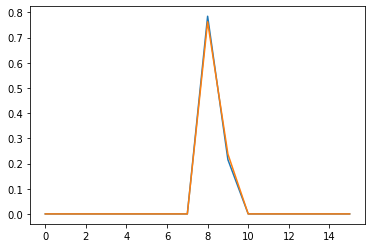

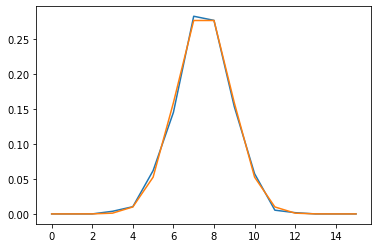

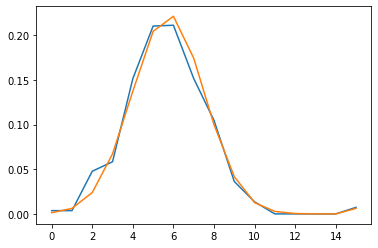

In [236]:
plt.plot(Bs[0,:])
plt.plot(B[2,:])
plt.show()
plt.plot(Bs[1,:])
plt.plot(B[1,:])
plt.show()
plt.plot(Bs[2,:])
plt.plot(B[0,:])
plt.show()

In [237]:
Ps

array([1.00000000e+000, 2.14857372e-089, 3.14266570e-131])